In [2]:
import csv
import pandas as pd

In [3]:
extract = pd.read_csv("egcut_epi_nesma_extracted_features_example.csv",header=None)

In [4]:
extract.columns = ["text_ID","start","end","object","value","unit","min","max"]

In [5]:
text = pd.read_csv("egcut_epi_nesma_texts_example.csv",header=None)

In [7]:
text.columns = ["text_ID","text"]

In [8]:
text = text.drop_duplicates(subset='text_ID', keep='first')

In [9]:
DS = pd.merge(extract, text, how="left", on='text_ID')

In [1]:
#from estnltk import Text

In [ ]:
# !pip install estnltk

In [9]:
# DS.to_csv("MergedDS.csv",index=False)

In [10]:
DS.head()

,text_ID,start,end,object,value,unit,min,max,text
0,46809,0,6,RR,130.0,NaN,NaN,NaN,RR 130/80 mmHg.
1,45389,165,171,RR,110.0,NaN,NaN,NaN,"Kergelt liigkaaluline. Nahk, limaskestad taval..."
2,47482,0,5,RR,142.0,NaN,NaN,NaN,"RR142/89mmHg, HR 76 x min, p167cm, k89kg. EKG..."
3,53393,0,5,RR,143.0,NaN,NaN,NaN,"RR143/87mmHg, HR60 x min, p180cm, k93kg"
4,53571,0,6,RR,140.0,NaN,NaN,NaN,RR 140/74 mm Hg Cor fr. 62 UH uuringul kaela a...


In [76]:
DSSubset = DS[1:1000]

### To do: We need to take the text which is mosly annotated

In [110]:
# DS.sort_values('text_ID')[1:50]

In [81]:
new_df = pd.DataFrame(DSSubset.text.str.split(" ").tolist(), index=DSSubset.text_ID).stack()

In [83]:
new_df = new_df.reset_index([0, 'text_ID'])

In [87]:
new_df.columns = ['text_ID', 'word']
new_df

,text_ID,word
0,45389,Kergelt
1,45389,liigkaaluline.
2,45389,"Nahk,"
3,45389,limaskestad
4,45389,tavalist
...,...,...
398441,6309,30min.
398442,6309,3
398443,6309,x
398444,6309,nädalas.


In [100]:
new_df["start"]= np.NaN
new_df["end"]= np.NAN
new_df

,text_ID,word,start,end
0,45389,Kergelt,NaN,NaN
1,45389,liigkaaluline.,NaN,NaN
2,45389,"Nahk,",NaN,NaN
3,45389,limaskestad,NaN,NaN
4,45389,tavalist,NaN,NaN
...,...,...,...,...
398441,6309,30min.,NaN,NaN
398442,6309,3,NaN,NaN
398443,6309,x,NaN,NaN
398444,6309,nädalas.,NaN,NaN


In [106]:
prev = 0
for i in range(1,len(new_df)):
    if(new_df["text_ID"][i-1] == new_df["text_ID"][i]):
        wordLen = len(new_df.word[i])
        new_df["start"][i] = prev 
        new_df["end"][i] = prev  + wordLen
        prev = new_df["end"][i] + 1
    else: 
        prev = 0
        wordLen = len(new_df.word[i])
        new_df["start"][i] = prev 
        new_df["end"][i] = prev  + wordLen
        prev = new_df["end"][i] + 1
    

C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_

In [107]:
new_df[1:50]

,text_ID,word,start,end
1,45389,liigkaaluline.,0.0,14.0
2,45389,"Nahk,",15.0,20.0
3,45389,limaskestad,21.0,32.0
4,45389,tavalist,33.0,41.0
5,45389,värvust.,42.0,50.0
6,45389,Kopsudesvesikulaarneh.,51.0,73.0
7,45389,"kahin,",74.0,80.0
8,45389,räginaid,81.0,89.0
9,45389,ei,90.0,92.0
10,45389,ole.,93.0,97.0


* 


In [126]:
new_df["tag"] = np.NaN

In [134]:
for i in range(1,3):
    mySubset = new_df.loc[new_df["text_ID"] == DSSubset["text_ID"][i]]
    mySubset = mySubset.reset_index()
    for j in range(len(mySubset)):
        if(mySubset["start"][j] in range(DSSubset["start"][i],DSSubset["end"][i])):
                new_df["tag"] = "Target"

In [132]:
new_df[1:50]

,text_ID,word,start,end,tag
1,45389,liigkaaluline.,0.0,14.0,Target
2,45389,"Nahk,",15.0,20.0,Target
3,45389,limaskestad,21.0,32.0,Target
4,45389,tavalist,33.0,41.0,Target
5,45389,värvust.,42.0,50.0,Target
6,45389,Kopsudesvesikulaarneh.,51.0,73.0,Target
7,45389,"kahin,",74.0,80.0,Target
8,45389,räginaid,81.0,89.0,Target
9,45389,ei,90.0,92.0,Target
10,45389,ole.,93.0,97.0,Target


In [113]:
df = pd.DataFrame({'num_legs': [1, 3], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])

In [118]:
df

,num_legs,num_wings
falcon,1,2
dog,3,0


In [117]:
df.isin(range(0, 3))

,num_legs,num_wings
falcon,True,True
dog,False,True


In [11]:
DS["objVal"] = DS["object"].astype(str) +" "+DS["value"].astype(str)

In [12]:
DSMerged = DS.groupby(['text_ID','text'], as_index = False).agg({'objVal': ' , '.join})

In [13]:
DSMerged.head(n=10)

,text_ID,text,objVal
0,970,"20.07.2009 10:02 - <ANONYM id=""2"" type=""per"" m...",eGFR 99.0
1,973,"09.07.2009 09:42 - <ANONYM id=""0"" type=""per"" m...",eGFR 90.0
2,1007,Kuupäev: 05.06.2012 08:31 Kood ja nimetus: 790...,Pikkus 175.0
3,1072,Kuupäev: 11.03.2014 00:39 Kood ja nimetus: 790...,Pikkus 155.0
4,1110,"29.06.2010 \nRadioloogiline uuring, vastus nr...",eGFR 115.0
5,1125,Kuupäev: 14.08.2012 09:01 Kood ja nimetus: 790...,Pikkus 157.0
6,1127,Kuupäev: 31.03.2013 13:18 Kood ja nimetus: 790...,Pikkus 181.0
7,1190,Kuupäev: 15.01.2013 14:08 Kood ja nimetus: 632...,"RR 130.0 , RR 129.0 , RR 131.0"
8,1214,Kuupäev: 30.10.2009 13:50 Kood ja nimetus: 632...,RR 113.0
9,1245,Kuupäev: 16.04.2013 12:28 Kood ja nimetus: 632...,RR 120.0


In [14]:
len(DSMerged)

121535

In [28]:
len(DS)

185888

In [20]:
X = DSMerged.text
Y = DSMerged.objVal
X = X[:5000]
Y = Y[:5000]

In [15]:
words = list(set(DSMerged["text"].values))

In [16]:
len(words)

117432

In [17]:
max_sent_len = max([len(sentence) for sentence in DSMerged.text])
max_sent_len

102602

In [18]:
import numpy as np
from keras.utils import np_utils

import matplotlib.pyplot as plt
from keras.layers import GRU,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer

%matplotlib inline

In [30]:
# def plot_history(history):
#     acc = history.history['accuracy']
#     val_acc = history.history['val_acc']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     x = range(1, len(acc) + 1)

#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(x, acc, 'b', label='Training acc')
#     plt.plot(x, val_acc, 'r', label='Validation acc')
#     plt.title('Training and validation accuracy')
#     plt.legend()
#     plt.subplot(1, 2, 2)
#     plt.plot(x, loss, 'b', label='Training loss')
#     plt.plot(x, val_loss, 'r', label='Validation loss')
#     plt.title('Training and validation loss')
#     plt.legend()

In [1]:
from keras_contrib.layers import CRF


Using TensorFlow backend.


In [21]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=1)

# Xtrain, Xval, Ytrain, Yval , Ztrain, Zval , Strain, Sval= train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=1)



In [27]:
shape = 3
encoder = LabelEncoder()
encoder.fit(Y) #3 classes in Object column


Ytrain = encoder.transform(Ytrain)
Ytest = encoder.transform(Ytest)

Ytrain = np_utils.to_categorical(Ytrain)
Ytest = np_utils.to_categorical(Ytest)



In [24]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Xtrain)

Xtrain = tokenizer.texts_to_sequences(Xtrain)
Xtest = tokenizer.texts_to_sequences(Xtest)
# Xval = tokenizer.texts_to_sequences(Xval)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



In [26]:
maxlen = 100

Xtrain = pad_sequences(Xtrain, padding='post', maxlen=maxlen)
Xtest = pad_sequences(Xtest, padding='post', maxlen=maxlen)
# Xval = pad_sequences(Xval, padding='post', maxlen=maxlen)


In [66]:
from keras.models import Sequential
from keras import layers
from keras.layers import Input, LSTM, Embedding, Dense
from keras.layers import Bidirectional,TimeDistributed
model = Sequential()

input_text = keras.layers.Input(shape=(maxlen,),dtype='int32',name="input_text")
emb = Embedding(input_dim=vocab_size, output_dim=256, input_length=maxlen)(input_text)
lstm_out = Bidirectional(keras.layers.LSTM(256))(emb)

# span = keras.layers.Input(shape=(2, ),name="span")
# merged = keras.layers.concatenate([lstm_out,span])
x = keras.layers.Dropout(0.1)(lstm_out)

# x = keras.layers.Dense(128, activation='relu')(lstm_out)
# x = keras.layers.Dense(64, activation='relu')(x)
# x = keras.layers.Dense(32, activation='relu')(x)
# output_object = keras.layers.Dense(1428, activation='linear',name="output_object")(x)
# from keras_contrib.layers import CRF

# x = TimeDistributed(Dense(1, activation='linear'))(x)  
x = Dense(1, activation='relu')(x)  
crf = CRF(1)
output_object = crf(x) 
# output_value = keras.layers.Dense(1, activation='linear',name="output_value")(x)


# model = keras.models.Model(inputs=[input_text,span],

model = keras.models.Model(input_text,outputs= output_object)
from keras.optimizers import adam 
opt = adam(lr=0.001)
# model.compile(optimizer= "adam" ,loss=[ "categorical_crossentropy","mean_squared_logarithmic_error"],metrics=['accuracy',"mse"])
model.compile(optimizer= opt ,loss= "categorical_crossentropy",metrics= ['accuracy'])
 
model.summary()


ValueError: Index out of range using input dim 2; input has only 2 dims for 'crf_9/strided_slice' (op: 'StridedSlice') with input shapes: [?,1], [3], [3], [3] and with computed input tensors: input[3] = <1 1 1>.

In [48]:
# tryx = Xtrain.reshape((3000,100))
# history = model.fit([tryx,Strain], y = [Ytrain,Ztrain],

# keras.callbacks.EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=2,
#                               verbose=0, mode='auto')

history = model.fit(Xtrain, y = Ytrain,
                    epochs=10,
                    verbose=True,
                     validation_split=0.2)
#                     validation_data=([Xval,Sval], [Yval,  Zval]),batch_size=1000)
#                     validation_data=(Xval, [Yval,  Zval]),batch_size=1000)

,batch_size=5000)


Epoch 1/10


InvalidArgumentError:  indices[27,0] = 1808 is not in [0, 1)
	 [[node embedding_13/embedding_lookup (defined at C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_9510]

Function call stack:
keras_scratch_graph


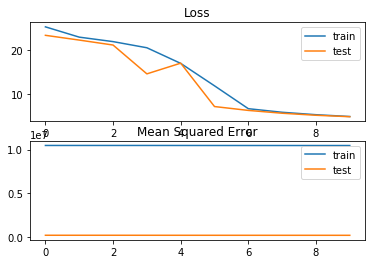

In [29]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['output_value_mse'], label='train')
pyplot.plot(history.history['val_output_value_mse'], label='test')
pyplot.legend()
pyplot.show()

In [30]:
# f= open("report.csv","a")
# loss1, accuracy1,loss2, accuracy2 = 
model.evaluate(Xtrain, [Ytrain,Ztrain], verbose=True)
# print("Training Accuracy: {:.4f}".format(accuracy))
# f.write(",{:.4f}".format(accuracy))

# loss, accuracy = model.evaluate(Xval, Yval, verbose=True)

# print("Validation Accuracy:  {:.4f}".format(accuracy))
# f.write(",{:.4f} \n".format(accuracy))
# f.close()
# plot_history(history)
# Ypred = model.predict(Xtest)
# from sklearn.metrics import confusion_matrix, classification_report

# matrix = confusion_matrix(Ytest.argmax(axis=1), Ypred.argmax(axis=1))
# classification_Report = classification_report(Ytest.argmax(axis=1), Ypred.argmax(axis=1), output_dict=True)
# df = pd.DataFrame(classification_Report).transpose()
# df.to_csv("ClassificationReport.csv")

3000/3000 [==============================] - 22s 7ms/step


[4.782543665568034,
 2.0504844188690186,
 2.729947566986084,
 0.12733332812786102,
 10459574.0]

In [31]:
pred1,pred2 = model.predict(Xval)


In [32]:
model.evaluate(Xtest, [Ytest,Ztest], verbose=True)


1000/1000 [==============================] - 7s 7ms/step


[4.848122142791748,
 2.093463897705078,
 2.746799945831299,
 0.12999999523162842,
 16023612.0]

In [38]:
from keras.models import Sequential
from keras import layers
from keras.layers import Input, LSTM, Embedding, Dense
from keras.layers import Bidirectional
model2 = Sequential()

input_text = keras.layers.Input(shape=(maxlen,),dtype='int32',name="input_text")
emb = Embedding(input_dim=vocab_size, output_dim=256, input_length=maxlen)(input_text)
lstm_out = Bidirectional(keras.layers.LSTM(256))(emb)

# span = keras.layers.Input(shape=(2, ),name="span")
# merged = keras.layers.concatenate([lstm_out,span])

x = keras.layers.Dense(128, activation='relu')(lstm_out)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)

output_object = keras.layers.Dense(3, activation='linear',name="output_object")(x)
# from keras_contrib.layers import CRF
# crf = CRF(3)
# output_object = crf(x) 
output_value = keras.layers.Dense(1, activation='linear',name="output_value")(x)


# model = keras.models.Model(inputs=[input_text,span],

model2 = keras.models.Model(input_text,
                                outputs=[output_object,output_value])
from keras.optimizers import adam 
opt = adam(lr=0.001)
# model.compile(optimizer= "adam" ,loss=[ "categorical_crossentropy","mean_squared_logarithmic_error"],metrics=['accuracy',"mse"])
model2.compile(optimizer= opt ,loss= {'output_object':"categorical_crossentropy",'output_value':"mean_squared_logarithmic_error"}, metrics={'output_object': 'accuracy','output_value': "mse"})
              #,metrics=['accuracy'])

model2.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_text (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 256)     9718272     input_text[0][0]                 
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 512)          1050624     embedding_2[0][0]                
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          65664       bidirectional_2[0][0]            
____________________________________________________________________________________________

In [39]:
# tryx = Xtrain.reshape((3000,100))
# history = model.fit([tryx,Strain], y = [Ytrain,Ztrain],

# keras.callbacks.EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=2,
#                               verbose=0, mode='auto')

history2 = model2.fit(Xtrain, y = [Ytrain,Ztrain],
                    epochs=10,
                    verbose=True,
#                     validation_data=([Xval,Sval], [Yval,  Zval]),batch_size=1000)
                    validation_data=(Xval, [Yval,  Zval]),batch_size=1000)

#,batch_size=5000


C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 30s 10ms/step - loss: 28.1943 - output_object_loss: 6.0319 - output_value_loss: 22.1624 - output_object_accuracy: 0.3093 - output_value_mse: 10468722.0000 - val_loss: 25.3448 - val_output_object_loss: 3.2259 - val_output_value_loss: 22.1188 - val_output_object_accuracy: 0.2290 - val_output_value_mse: 214532.1562
Epoch 2/10
3000/3000 [==============================] - 32s 11ms/step - loss: 24.1951 - output_object_loss: 2.1957 - output_value_loss: 21.9994 - output_object_accuracy: 0.2333 - output_value_mse: 10468710.0000 - val_loss: 22.5871 - val_output_object_loss: 0.7297 - val_output_value_loss: 21.8574 - val_output_object_accuracy: 0.1590 - val_output_value_mse: 214523.6094
Epoch 3/10
3000/3000 [==============================] - 35s 12ms/step - loss: 22.3837 - output_object_loss: 0.7259 - output_value_loss: 21.6578 - output_object_accuracy: 0.1493 - output_value_mse: 10468688.0000 -

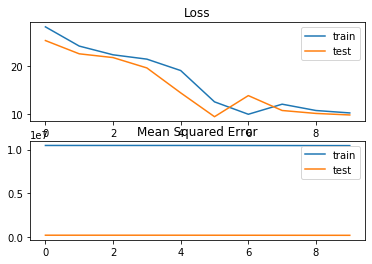

In [40]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history2.history['output_value_mse'], label='train')
pyplot.plot(history2.history['val_output_value_mse'], label='test')
pyplot.legend()
pyplot.show()

In [41]:
model2.evaluate(Xtrain, [Ytrain,Ztrain], verbose=True)


3000/3000 [==============================] - 34s 11ms/step


[10.091463821411132,
 9.190621376037598,
 0.9032018780708313,
 0.3096666634082794,
 10447953.0]

In [37]:
from tensorflow_addons.text.crf import crf_binary_score